<a href="https://colab.research.google.com/github/BrenoMafra13/COMP3132-Machine_Learning/blob/main/labs/Lab_Week04/LabWeek4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: Basic regression - Predict fuel efficiency



## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # we use this library to load the dataset
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Load data

In [2]:
# Load the 'mpg' dataset using seaborn library into a Pandas DataFrame
df = sns.load_dataset('mpg')

MPG dataset can be viewed online at  
https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv

## Data Exploration - Pandas Review

### Show the first 5 rows of the dataset

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Show the size of the dataframe

In [6]:
df.shape

(398, 9)

### Find the columns name and their types (numerical or categorical)

In [7]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### Find the number of missing values in each column

In [11]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


### Handle the missing values in the dataframe

Since the number of missing values is low, we can simply drop the rows containing them. However, as a practice and review, let's substitute the missing values in the numerical columns (if any) with the mean of the respective column and the missing values in the categorical columns (if any) with the median of the respective column.

In [14]:
df = df.dropna()

In [15]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [17]:
df.shape # Notice the difference and study for the test.

(392, 9)

### Compute the average and the median weight

In [19]:
df["weight"].mean()

np.float64(2977.5841836734694)

In [18]:
df["weight"].median()

2803.5

<Axes: >

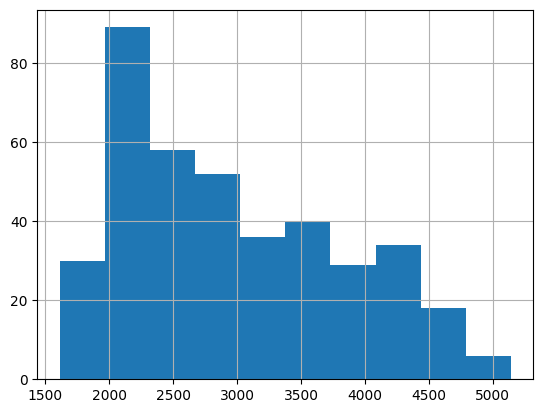

In [22]:
df["weight"].hist()

### Find the number of cars that weight more than 2000 kgs

In [21]:
cars = df["weight"] > 2000
cars.sum()

np.int64(349)

### Find how many cars there are for each number of cylinders

In [23]:
df["cylinders"].value_counts()

,count
cylinders,
4,199
8,103
6,83
3,4
5,3


### Find what are the car models with number of cylinders (3 or 5)

In [24]:
df[(df["cylinders"] == 3) | (df["cylinders"] == 5)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
71,19.0,3,70.0,97.0,2330,13.5,72,japan,mazda rx2 coupe
111,18.0,3,70.0,90.0,2124,13.5,73,japan,maxda rx3
243,21.5,3,80.0,110.0,2720,13.5,77,japan,mazda rx-4
274,20.3,5,131.0,103.0,2830,15.9,78,europe,audi 5000
297,25.4,5,183.0,77.0,3530,20.1,79,europe,mercedes benz 300d
327,36.4,5,121.0,67.0,2950,19.9,80,europe,audi 5000s (diesel)
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs


### Show the `value_counts()` of `origin` column or show the unique values of this column.

In [25]:
df["origin"].value_counts()

,count
origin,
usa,245
japan,79
europe,68


## Data Preprocessing

### Use one hot encoding to change the categorical values of `origin` column to numerical values.

- use `pd.get_dummies()` method to do the encoding
- Join the original DataFrame with the new dummy DataFrame with `pd.concat()` and use `axis=1` to concate in horizontal direction.

### Fixing the Data Preprocessing Steps

In [59]:
# Re-load the original dataset to reset the DataFrame state
df = sns.load_dataset('mpg')

# Handle missing values as before
df = df.dropna()

# Perform one-hot encoding on the 'origin' column, ensuring numeric output
df = pd.concat([df, pd.get_dummies(df['origin'], prefix='origin', dtype=int)], axis=1)

### Remove the `name` and `origin` column form the dataframe to have all numerical dataframe.

In [60]:
# Now, drop the original 'name' and 'origin' columns
df = df.drop(['name', 'origin'], axis=1)

# Display the head of the modified DataFrame to confirm
display(df.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


### Does the input needs reshaping?

**Answer:** For tabular data like this, reshaping is typically not required as the input is already 2D (samples, features). The input to the model will be (batch_size, number_of_features).

### Form features `X` and labels `y` based on the processed datafram

In [50]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin_europe', 'origin_japan',
       'origin_usa'],
      dtype='object')

In [61]:
X = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin_europe', 'origin_japan',
       'origin_usa']]
y = df['mpg']

In [62]:
# 'mpg' is our target variable, the rest are features.
X = df.drop('mpg', axis=1)
y = df['mpg']

### Split the data into training and test sets and form `train_features`, `train_labels`, `test_features`, `test_labels`

In [63]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

### For simplicity in the following steps, convert the dataset from a pandas DataFrame to a numpy array.

In [64]:
train_features = np.array(train_features)
train_labels = np.array(train_labels)
test_features = np.array(test_features)
test_labels = np.array(test_labels)

### Do some sanity check on the shape of the data before building a model

In [65]:
print(f"Shape of train_features: {train_features.shape}")
print(f"Shape of train_labels: {train_labels.shape}")
print(f"Shape of test_features: {test_features.shape}")
print(f"Shape of test_labels: {test_labels.shape}")

Shape of train_features: (313, 9)
Shape of train_labels: (313,)
Shape of test_features: (79, 9)
Shape of test_labels: (79,)


## Normalization layer

To ensure stable training of neural networks, we typically normalize the data. This process also enhances the convergence of the gradient descent algorithm.

There is not single way to normalize the data. You can also use `scikit-learn `or `pandas` to do it. However, in this lab, we will use the normalization layer provided by tensorflow which matches the other parts of the model.

The `tf.keras.layers.Normalization` is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [66]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Then, fit the state of the preprocessing layer to the data by calling `Normalization.adapt`.

It calculates the mean and variance of each feature, and store them in the layer

In [67]:
normalizer.adapt(train_features)

When the layer is called, it returns the input data, with each feature independently normalized.

In [70]:
first = train_features[0]
print('First example:', first)
print()
print('Normalized:', normalizer(first).numpy())

First example: [6.00e+00 2.25e+02 1.10e+02 3.62e+03 1.87e+01 7.80e+01 0.00e+00 0.00e+00
 1.00e+00]

Normalized: [[ 0.3048616   0.2845775   0.14142872  0.7548031   1.1217592   0.4945284
  -0.42559615 -0.50199604  0.74128604]]


## **Approach #1:** Regression using `Linear Regression`

**You are welcome to use scikit-learn to perform linear regression on this dataset.**

However, here we aim to implement it using TensorFlow.

- As we saw in Lab Week 2, `logistic regression` is essentially a single neuron with a `sigmoid` activation function.

- Similarly, `linear regression` can be viewed as a single neuron with a `linear` activation function.

### **Step 1:** Linear regression model architecture

In [71]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(9,)),
    normalizer,
    layers.Dense(1, activation='linear')
])

**Note:** You can define your model all at once like the cell above or you can buid the model incrementaly  (suitable for your assignment)

In [72]:
# Defining the model incrementaly (suitable for your assignment)
linear_model = tf.keras.Sequential()
linear_model.add(tf.keras.layers.Input(shape=(9,)))
linear_model.add(normalizer)
linear_model.add(layers.Dense(1, activation='linear'))

### **Step 2:** Configure the model with Keras `Model.compile()`

The most important arguments to compile are the `loss` and the `optimizer`, since these define what will be optimized (`"mean_absolute_error"`) and how (using the `tf.keras.optimizers.Adam(learning_rate=0.1)`).

**arguments:**
- optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
- loss='mean_absolute_error'

In [75]:
#your code here
linear_model.compile(loss = 'mean_absolute_error', optimizer = tf.keras.optimizers.Adam(learning_rate=0.1))

### **Step 3:** Train the model using the `Model.fit()` for `100` epochs, and store the output in a variable named history.

In [76]:
history = linear_model.fit(train_features, train_labels, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 23.3617
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.0417 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.3508 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.4754 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.6793 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.4473 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.1634 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.4252 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.5519 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.3137 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.5877 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.5489 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.9749 
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.6683 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [77]:
history.history

{'loss': [23.228622436523438,
  22.172544479370117,
  21.1790714263916,
  20.17675018310547,
  19.180164337158203,
  18.21820831298828,
  17.18883514404297,
  16.185434341430664,
  15.198014259338379,
  14.189931869506836,
  13.199692726135254,
  12.202238082885742,
  11.212449073791504,
  10.221943855285645,
  9.241911888122559,
  8.233845710754395,
  7.265571117401123,
  6.297757625579834,
  5.465832233428955,
  4.654933929443359,
  3.928352117538452,
  3.4690074920654297,
  3.1500887870788574,
  2.8450727462768555,
  2.7140817642211914,
  2.6519076824188232,
  2.563060760498047,
  2.5371673107147217,
  2.515137195587158,
  2.5155155658721924,
  2.526038408279419,
  2.511810779571533,
  2.498523473739624,
  2.5024008750915527,
  2.499452829360962,
  2.4979779720306396,
  2.500365734100342,
  2.548757553100586,
  2.5196478366851807,
  2.5292928218841553,
  2.5299594402313232,
  2.5141687393188477,
  2.5142276287078857,
  2.496466636657715,
  2.50516414642334,
  2.504681348800659,
  2.

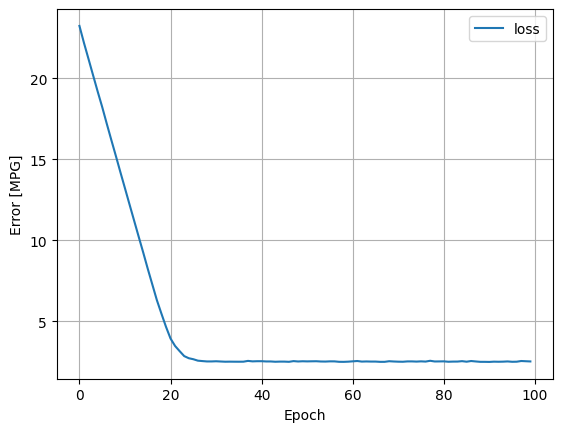

In [78]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

### Get the model summary

In [79]:
linear_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 9)              │            19 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (212.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 19 (80.00 B)

 Optimizer params: 22 (92.00 B)

### **Step 4:** Evaluate the linear model on the test set using Keras `Model.evaluate()` and see the `mean_absolute_error` and save the result for future comparison.

In [80]:
linear_test_loss = linear_model.evaluate(test_features, test_labels, verbose=0)
print(f"Linear Model Test Loss (MAE): {linear_test_loss}")

Linear Model Test Loss (MAE): 2.3879904747009277


## **Approach #2:** Regression using a `Deep Neural Network (DNN)`

### Solve the same problem and using deep neural network with the sample architecture;
- 1st hidden layer no. of units =  64
- 2nd hidden layer no. of units = 64
- Choose appropriate `activation` functions for hidden and output layers

In [81]:
dnn_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])

dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error'
)

history_dnn = dnn_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0 # suppress logging
)

### Print the model summary (after training). How many parameters are there in the model?

In [82]:
dnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 9)              │            19 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,616 (57.10 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 19 (80.00 B)

 Optimizer params: 9,732 (38.02 KB)

## Compare the evaluation result of the two approaches, i.e., linear regression and deep neural network.

In [83]:
dnn_test_loss = dnn_model.evaluate(test_features, test_labels, verbose=0)
print(f"Linear Model Test Loss (MAE): {linear_test_loss}")
print(f"DNN Model Test Loss (MAE): {dnn_test_loss}")

if dnn_test_loss < linear_test_loss:
    print("The Deep Neural Network model performed better than the Linear Regression model.")
elif dnn_test_loss > linear_test_loss:
    print("The Linear Regression model performed better than the Deep Neural Network model.")
else:
    print("Both models performed similarly.")

Linear Model Test Loss (MAE): 2.3879904747009277
DNN Model Test Loss (MAE): 1.6876858472824097
The Deep Neural Network model performed better than the Linear Regression model.


## Use the following large model and evaluate it on the test set.

In [85]:
model_dnn_large = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])


In [86]:
model_dnn_large.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error'
)

history_dnn_large = model_dnn_large.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0 # suppress logging
)

large_dnn_test_loss = model_dnn_large.evaluate(test_features, test_labels, verbose=0)
print(f"Large DNN Model Test Loss (MAE): {large_dnn_test_loss}")

Large DNN Model Test Loss (MAE): 1.672369122505188


### Explain your observation. Why do you think the large model is not performing well?

- hint: when the number of trainable parameters is very large (even larger than the number of data points), the model may overfit the training data. One way to solve this problem is to use more data.

**Answer:** The large model is likely overfitting. With too many parameters and insufficient data, it memorizes training examples rather than learning generalizable patterns, leading to poorer performance on unseen test data compared to the smaller DNN.